# Support Vector Machine (SVM)
***Objective***: To maximize the **Margin** which is the distance between the separating **hyperplane** (i.e. decision boundary) and the **Support Vectors** (i.e. the training samples that are closest to this hyperplane).

- ***Q***: Why do we need _decision boundaries with large margins_?
- ***A***: They tend to have a _lower generalization error_ (whereas models with small margins are more prone to overfitting.)

![Support Vectors](images/sv.png)

The _positive_ and _negative_ hyperplanes that are parallel to the decision boundary, can be expressed as follows:
$$w_0 + w^Tx_{pos} = 1$$
$$w_0 + w^Tx_{neg} = -1$$

>By subtracting those two linear equations from each other, we get:
$$\Rightarrow w^T(x_{pos}-x_{neg}) =2$$

>We can **normalize** this by the length of the vector $w$, which is defned as follows:
$$\|w\| =\sqrt{\sum_{j=1}^{m} w_j^2}$$

So we arrive at the following equation:
### $$\frac{w^T(x_{pos}-x_{neg})}{\|w\|}=\frac{2}{\|w\|}$$
The left side of the equation can be interpreted as the _distance between the positive and negative hyperplane_ (i.e the **margin** that we want to maximize).

Now,

***Objective function of the SVM***:  The maximization of this margin by maximizing $\color{purple}{\frac{2}{\|w\|}}$ under the constraint that the samples are classifed correctly, which can be written as follows:
$$w_0+w^Tx^{(i)}\geq1 \;if\:y^{(i)} = 1$$
$$w_0+w^Tx^{(i)}<-1 \;if\:y^{(i)} = -1$$

This can also be written more compactly as follows:
### $$y^{(i)}(w_0+w^Tx^{(i)})\geq 1\forall_i$$

In practice, though, it is easier to minimize the reciprocal term $\color{purple}{\frac{1}{2}\|w\|^2}$

***Dealing with nonlinearly separable data using slack variables***: Slack variable, $\xi$ was introduced because linear constraints need to be relaxed for nonlinearly separable data to allow "_convergence of the optimization in the presence of misclassifcations under the appropriate cost penalization_." 
The positive-values slack variable is simply added to the linear constraints:
$$w^Tx^{(i)}\geq \;if\:y^{(i)} = 1 - \xi^{(i)}$$
$$w^Tx^{(i)}< -1 \;if\:y^{(i)} = 1 + \xi^{(i)}$$

So

**The new objective to be minimized:** 
### $$\frac{1}{2}\|w\|^2 + C(\sum_{i}\xi^{(i)})$$
Using the variable $C$, we can then control the penalty for misclassifcation. Large values of $C$ correspond to large error penalties, whereas, we are less strict about misclassifcation errors if we choose smaller values for $C$. We can then we use the parameter $C$ to control the width of the margin and therefore tune the bias-variance trade-off. This is _regularization_:  Increasing the value of $C$ increases the bias and lowers the variance of the model.
![Bias-Variance Trade-off](images/bvto.png)

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from sklearn import datasets
iris = datasets.load_iris()

## Building the Model


### Creating features and Labels

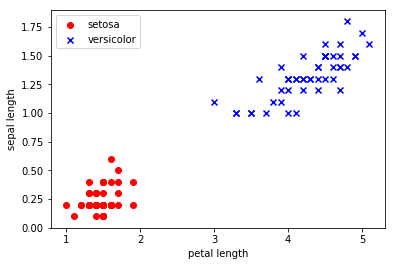

In [53]:
X = iris.data[:, [2, 3]]
y = iris.target

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.savefig('images/petal_sepal_scatter.png', dpi=200)

### Splitting the dataset

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

### Preprocessing

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Importing the Model

In [57]:
from sklearn.svm import SVC

### Create and fit a    Classifier

In [58]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

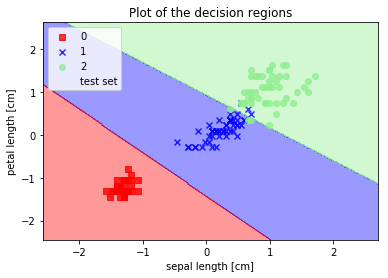

In [59]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02,test_idx=None):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, 
                    c=cmap(idx), marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, 
                    linewidth=1, marker='o', s=55, label='test set')
        
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Plot of the decision regions')
plt.savefig('images/decision_boundaries.png', dpi=200)